In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [5]:
df = pd.read_csv("subscription_renewal_data.csv")

In [6]:
df.head()

,customer_id,subscription_plan,tenure_months,monthly_fee,renewal_status,usage_hours,support_tickets
0,C001,Basic,3,199,No,12,2
1,C002,Premium,12,499,Yes,120,0
2,C003,Standard,6,299,Yes,60,1
3,C004,Basic,1,199,No,5,3
4,C005,Premium,24,499,Yes,200,0


In [7]:
df.tail()

,customer_id,subscription_plan,tenure_months,monthly_fee,renewal_status,usage_hours,support_tickets
10,C011,Premium,6,499,Yes,75,0
11,C012,Standard,18,299,Yes,140,1
12,C013,Basic,5,199,No,25,2
13,C014,Premium,30,499,Yes,250,0
14,C015,Standard,7,299,Yes,65,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        15 non-null     object
 1   subscription_plan  15 non-null     object
 2   tenure_months      15 non-null     int64 
 3   monthly_fee        15 non-null     int64 
 4   renewal_status     15 non-null     object
 5   usage_hours        15 non-null     int64 
 6   support_tickets    15 non-null     int64 
dtypes: int64(4), object(3)
memory usage: 972.0+ bytes


In [9]:
df.describe()

,tenure_months,monthly_fee,usage_hours,support_tickets
count,15.000000,15.000000,15.000000,15.000000
mean,10.066667,332.333333,82.800000,1.066667
std,8.404647,129.099445,71.592298,0.961150
min,1.000000,199.000000,5.000000,0.000000
25%,4.500000,199.000000,22.500000,0.000000
50%,7.000000,299.000000,65.000000,1.000000
75%,13.500000,499.000000,115.000000,2.000000
max,30.000000,499.000000,250.000000,3.000000


In [10]:
df.isnull().sum()

customer_id          0
subscription_plan    0
tenure_months        0
monthly_fee          0
renewal_status       0
usage_hours          0
support_tickets      0
dtype: int64

In [11]:
renewal_counts=df['renewal_status'].value_counts()

In [12]:
print(renewal_counts)

renewal_status
Yes    10
No      5
Name: count, dtype: int64


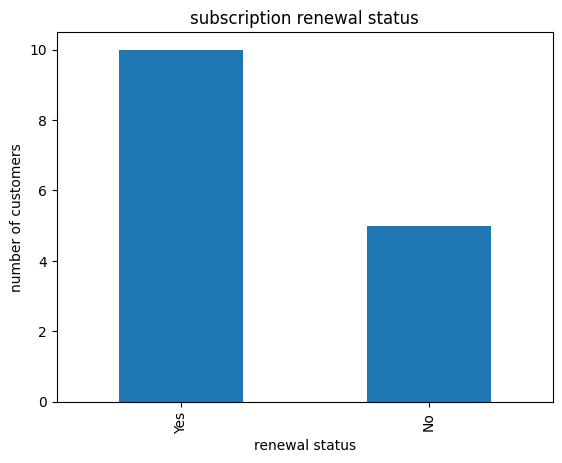

In [13]:
plt.figure()
renewal_counts.plot(kind='bar')
plt.title("subscription renewal status")
plt.xlabel("renewal status")
plt.ylabel("number of customers")
plt.show()

In [14]:
df.columns = df.columns.str.replace(" ","_")

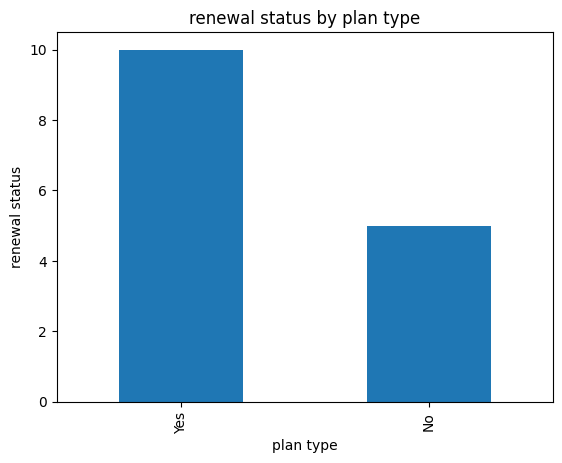

In [15]:
plt.figure()
renewal_counts.plot(kind='bar')
plt.title("renewal status by plan type")
plt.xlabel("plan type")
plt.ylabel("renewal status")
plt.show()

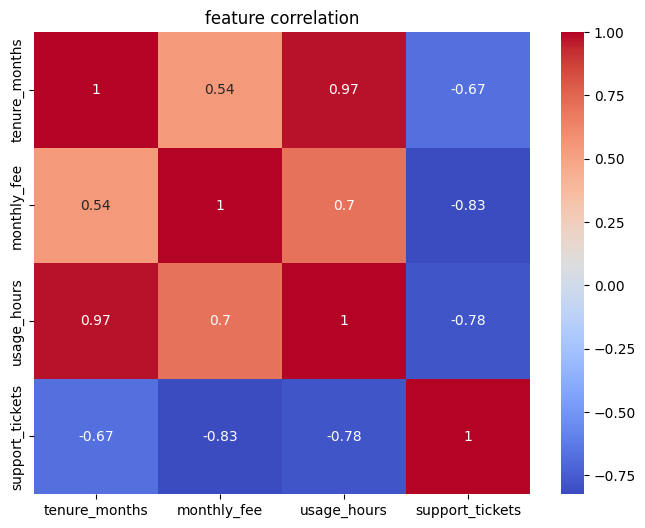

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.title("feature correlation")
plt.show()

In [17]:
tenure_analysis=df.groupby('renewal_status')['tenure_months'].mean()

In [18]:
print(tenure_analysis)

renewal_status
No      3.0
Yes    13.6
Name: tenure_months, dtype: float64


In [19]:
total_customers=renewal_counts.sum()
retention_rate=(df['renewal_status']=='renewed').mean() * 100
churn_rate=100-retention_rate

In [20]:
print(retention_rate,"%")

0.0 %


In [21]:
print("churn rate:",round(churn_rate,2),"%")

churn rate: 100.0 %


In [22]:
print("\n---final inside---")


---final inside---
